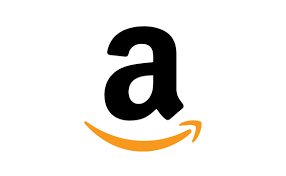
<h2 style="font-face: verdana; font-size: 32px;">Amazon Reviews</h2>
<h3 style="font-face: verdana; font-size: 16px;">Derive rich features for Machine Learning with the Watson Cognitive APIs</h3>
<br><br>

<h3 style="font-face: verdana; font-size: 16px;">The objective of this machine learning model is to predict the rating a user would give a product based on his or her customer review.</h3>

The dataset contains ID of the reviewer, the product ID, the reviewer's name, a helpfulness rating of the review by other users, the review text, an overall rating of the product, a summary of the review and the time of the review. In this machine learning model, we will only be using the review text and the user's overall rating of the product.
<br><br>

Data fields in the dataset:


    reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    asin - ID of the product, e.g. 0000013714
    reviewerName - name of the reviewer
    helpful - helpfulness rating of the review, e.g. 2/3
    reviewText - text of the review
    overall - rating of the product
    summary - summary of the review
    unixReviewTime - time of the review (unix time)
    reviewTime - time of the review (raw)

<br><br>
<img src="https://github.com/hackerguy/Amazon/blob/master/SampleReview.jpg?raw=true/">
<br><br>

<h3 style="font-face: verdana; font-size: 16px;">Approach</h3>

We will approach this challenge by first using a traditional multiclassification machine learning approach. We will then explore using IBM Watson Natural Language Understanding to derive additional enhanced features on which to learn a machine learning model.

<h3 style="font-face: verdana; font-size: 16px;">IBM Watson Natural Language Understanding</h3>

IBM Watson™ Natural Language Understanding (NLU) can analyze semantic features of text input, including categories, concepts, emotion, entities, keywords, metadata, relations, semantic roles, and sentiment. In this example, we will utilize the emotion and sentiment features of NLU to create enhanced machine learning features.


<h4 style="font-face: verdana; font-size: 16px;">Emotion</h4>

The emotion feature of NLU allows you to analyze emotion conveyed by specific target phrases or by the document as a whole. You can also enable emotion analysis for entities and keywords that are automatically detected by the service. In this example, we will simply analyze the spooky excerpt as a whole. The emotions we will derive features for are 

- Anger
- Joy
- Sadness
- Fear
- Disgust

Emotion scores range from 0 to 1 for sadness, joy, fear, disgust, and anger. A 0 means the text doesn't convey the emotion, and a 1 means the text definitely carries the emotion.

<h4 style="font-face: verdana; font-size: 16px;">Sentiment</h4>

The sentiment feature of NLU allows you to analyze the sentiment toward specific target phrases and the sentiment of the document as a whole. You can also get sentiment information for detected entities and keywords by enabling the sentiment option for those features. In this example, we will simply analyze the spooky excerpt as a whole.

The sentiment score ranges from -1 (negative sentiment) to 1 (positive sentiment).



# Notebook Flow


**Part 1: [Traditional Machine Learning](#Part-1:-Traditional-Machine-Learning)**
  1. [Read in the Data](#1.-Read-in-the-Data)<br>
  2. [Clean the Data](#2.-Clean-the-Data)<br>
  3. [Feature Engineering](#3.-Feature-Engineering)<br>
  4. [Build ML Pipeline and Learn a Model](#4.-Build-ML-Pipeline-and-Learn-a-Model)<br>
  5. [Evaluate the Model](#5.-Evaluate-the-Model)
    
**Part 2: [Machine Learning using Watson Cognitive APIs](#Part-2:-Machine-Learning-using-Watson-Cognitive-APIs)**
  1. [Set up for Use of the Natural Language Understanding Service](#1.-Set-up-for-Use-of-the-Natural-Language-Understanding-Service)<br>
  2. [Create Enhanced Features using the NLU Service](#2.-Create-Enhanced-Features-using-the-NLU-Service)<br>
  3. [Retrain Model with NLU Features Added](#3.-Retrain-Model-with-NLU-Features-Added)
  4. [Evaluate the Model Learned with NLU Features](#4.-Evaluate-the-Model-Learned-with-NLU-Features)


# Part 1: Traditional Machine Learning

This section will employ a traditional multiclassification machine learning approach to learning a model.

## 1. Read in the Data

### Download and unzip the dataset

In [1]:
import os
if os.path.isfile('reviews_Patio_Lawn_and_Garden_5.gz'):
    os.remove("reviews_Patio_Lawn_and_Garden_5.gz")
if os.path.isfile('reviews_Patio_Lawn_and_Garden_5.json'):
    os.remove("reviews_Patio_Lawn_and_Garden_5.json")
import wget
url = 'https://github.com/hackerguy/Amazon/blob/master/reviews_Patio_Lawn_and_Garden_5.gz?raw=true?raw=true -O reviews_Patio_Lawn_and_Garden_5.json'
wget.download(url)

import gzip
with gzip.open('reviews_Patio_Lawn_and_Garden_5.gz', 'rb') as f:
    file_content = f.read() 

file = open('reviews_Patio_Lawn_and_Garden_5.json','w') 
file.write(file_content) 
file.close() 

### Read in the data set as a Spark DataFrame
#### Infer schema and column names

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

data = (spark.read
  .format('json')
  .option("inferSchema", "true")
  .load('reviews_Patio_Lawn_and_Garden_5.json'))

### Display the dataframe

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
data.toPandas().head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002N674,"[4, 4]",4,"Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.","06 21, 2011",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Great Hoses,1308614400
1,B00002N674,"[0, 0]",5,This is a high quality 8 ply hose. I have had good luck with Gilmour hoses in the past. A good choice in hoses.,"06 9, 2014",A32JCI4AK2JTTG,"Darryl Bennett ""Fuzzy342""","Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch by 50-Foot, Green",1402272000
2,B00002N674,"[2, 3]",4,"It's probably one of the best hoses I've ever had.Pro's:- It's good enough for most front yards, or small back yards.- It has enough flow (and with the right head) to water plants 25ft away from the nozzle, and water your garden.- It's light weight, and flexible (it does not pose as much of a problem unrolling this hose with kinks as with other hoses I've owned)- The hose is flexible, yet strong. I haven't cut the outside yet.- This hose has been in full sunlight for more than 3 months, and the rubber hasn't cracked yet! I believe it's good quality rubber.cons:- Like with every hose, keeping it outside in the sunshine, the water warms up and starts smelling.My dog don't want to drink from the water coming from this hose.- The hose is only in one color (I wished it was a little less visible in the gardenOtherwise this hose is an excellent garden tool!I bought 2 of them, one 25ft for my front garden, and 50ft for my rear garden.3-4months and still in excellent condition!","05 5, 2012",A3N0P5AAMP6XD2,H B,Very satisfied!,1336176000
3,B00002N674,"[0, 0]",5,"I probably should have bought something a bit more flexible and less rugged since I constantly coil/uncoil it for washing cars, but that's my fault not a product fault.","07 15, 2013",A2QK7UNJ857YG,Jason,Very high quality,1373846400
4,B00002N674,"[1, 1]",5,"I bought three of these 5/8-inch Flexogen hoses--50, 75, and 100 feet--for different areas of yard around the house. After a season of use they've proven to be good hoses. Of course, it's very favorable that they don't leak. But what particularly impresses me about them is their notably light weight and flexibility, which make them a lot easier to handle than my previous hoses. The flexibility diminishes in cold weather, but a garden hose is less useful then anyway.They're not especially prone to kinking, but they're not kink-proof, either, nor do they claim to be. They kink a lot less than one of my old hoses and more than a couple of others, but the latter were fairly stiff, so there was a trade-off.Bottom line: this was a good purchase.","08 5, 2013",AS0CYBAN6EM06,jimmy,Good Hoses,1375660800


In [4]:
data = data.select('reviewText', 'overall')
data = data.withColumnRenamed('reviewText', 'text')
data = data.withColumnRenamed('overall', 'label')

### Show the schema of the data including data types

In [5]:
data.printSchema()

root
 |-- text: string (nullable = true)
 |-- label: double (nullable = true)



### Dataset Overview - number of rows and columns

In [6]:
print("There are {} rows in the dataset.".format(str(data.count())))
print("There are {} columns in the dataset.".format(str(len(data.columns))))

There are 13272 rows in the dataset.
There are 2 columns in the dataset.


In [7]:
data = data.na.drop()
print("There are {} rows in the dataset.".format(str(data.count())))
print("There are {} columns in the dataset.".format(str(len(data.columns))))

There are 13272 rows in the dataset.
There are 2 columns in the dataset.


### Balance the data and use a subset of the data for processing efficiency

In [53]:
print('The number of records in the original data set is {}.'.format(data.count()))
print('The number of rows labeled 1 in the original data set is {}.'.format(data.filter(data['label'] == 1).count()))
print('The number of rows labeled 2 in the original data set is {}.'.format(data.filter(data['label'] == 2).count()))
print('The number of rows labeled 3 in the original data set is {}.'.format(data.filter(data['label'] == 3).count()))
print('The number of rows labeled 4 in the original data set is {}.'.format(data.filter(data['label'] == 4).count()))
print('The number of rows labeled 5 in the original data set is {}.'.format(data.filter(data['label'] == 5).count()))

The number of records in the original data set is 500.
The number of rows labeled 1 in the original data set is 100.
The number of rows labeled 2 in the original data set is 100.
The number of rows labeled 3 in the original data set is 100.
The number of rows labeled 4 in the original data set is 100.
The number of rows labeled 5 in the original data set is 100.


In [55]:
# Set a limit to the number of rows used across each overall score value, which is our label for the model
limit = 100

In [10]:
data1 = data.filter(data['label'] == 1).limit(limit)
data2 = data.filter(data['label'] == 2).limit(limit)
data3 = data.filter(data['label'] == 3).limit(limit)
data4 = data.filter(data['label'] == 4).limit(limit)
data5 = data.filter(data['label'] == 5).limit(limit)
data = data1.union(data2).union(data3).union(data4).union(data5)

In [54]:
print('The number of records in the data set is now {}.'.format(data.count()))
print('The number of rows labeled 1 in the data set is now {}.'.format(data.filter(data['label'] == 1).count()))
print('The number of rows labeled 2 in the data set is now {}.'.format(data.filter(data['label'] == 2).count()))
print('The number of rows labeled 3 in the data set is now {}.'.format(data.filter(data['label'] == 3).count()))
print('The number of rows labeled 4 in the data set is now {}.'.format(data.filter(data['label'] == 4).count()))
print('The number of rows labeled 5 in the data set is now {}.'.format(data.filter(data['label'] == 5).count()))

The number of records in the data set is now 500.
The number of rows labeled 1 in the data set is now 100.
The number of rows labeled 2 in the data set is now 100.
The number of rows labeled 3 in the data set is now 100.
The number of rows labeled 4 in the data set is now 100.
The number of rows labeled 5 in the data set is now 100.


## 2. Clean the Data

### Drop rows with null values

In [12]:
data = data.na.drop()
print("There are {} rows in the dataset.".format(str(data.count())))
print("There are {} columns in the dataset.".format(str(len(data.columns))))

There are 500 rows in the dataset.
There are 2 columns in the dataset.


### Remove punctuation from the text

In [13]:
from pyspark.ml.feature import SQLTransformer
removePunctuationTrans = SQLTransformer(
    statement="""SELECT *, TRANSLATE(text,',.:;!?@#$%^&*()+=-`~{}[]|\/''"<>','') AS textNoPunctuation FROM __THIS__""")
data = removePunctuationTrans.transform(data)
data.select('text', 'textNoPunctuation').toPandas().head()

,text,textNoPunctuation
0,"UPDATE: Originally, I gave this hose 5 stars but after using them (I bought 3) for a while, I've changed my opinion. Yes, the hoses appear to be well made and are lighter weight than my old professional grade rubber hoses, but Flexogens are still heavy. These Flexogen hoses DO kink, and they kink easily. The only way to reduce the kinking is to completely unroll the entire 100 feet of hose from the reel, lay it flat on the grund, and then turn and turn and turn (twist/rotate) it until it lays completely flat -- make sure there are no ""waves"" or loops. I pulled about 50 feet off the hose reel and, holding the end, walked across my yard. I did not stop to twist out the waves and loops that it formed while unrolling. The hose formed 9 kinks! What a pain in the hand, elbow and shoulder to straighten it! This process wastes time.The second problem is after I screw on my hose wand and turn on the water, this hose becomes unwieldy. The hose turns so that my wand is upside down. It requires a LOT of effort to twist the hose and hold it so the wand sprays downward--requires using both hands. Fighting this hose is painful, very tiring and aggravating.When you rewind it onto a hose reel, the hose twists and turns, causing it to again form waves and loops, which become kinks. Again, you have to twist, rotate, etc. to get all the waves/loops out so the hose lays flat and straight on the ground. As you reel it in, you have to stop and repeat the process. My old commercial-grade hose never did anything like this. You can buy the professional/commercial grade hoses (100 ft) at big box stores and clubs for about $25. Don't buy the Flexogen.Due to age and arthritis in my hands, I needed to replace my heavy, rubber commercial-grade garden hoses with lighter weight, easier-to-maneuver hoses. I was barely able to wind the old rubber hoses on the hose reel or drag them around the yard. After reading reviews on Amazon and other places for garden hoses, I chose this hose. I'm glad I did. While it's still heavy, it weighs considerably less than my commercial-grade rubber hose. It's easier to wind on the reel and easier to drag around the yard.The Amazon description calls this a ""lightweight"" hose. It is NOT light. It's substantial. I found a local store that had this hose in 25-, 50- and 75-ft lengths. I was able to lift each and compare to heavy duty hoses of the same length. I couldn't feel much of a difference, so I definitely would call this a medium- to heavy-weight hose (but lighter than my rubber one).This hose is easier to handle than my old rubber ones because it's more flexible. (I suspect that my old hoses have stiffened over the years.)I've only used one (I bought 3 of these) for about 1.5 weeks. It's been too hot, too muggy and too rainy to use it much, but I'm pleased so far. I believe this hose is a very good quality and should last many years. The solid brass fittings are thick so they won't get dents that cause leaks. Because I haven't dragged it around the yard yet, I cannot say whether it really is a ""no-kink"" hose. I recommend this hose because o the quality.",UPDATE Originally I gave this hose 5 stars but after using them I bought 3 for a while I've changed my opinion Yes the hoses appear to be well made and are lighter weight than my old professional grade rubber hoses but Flexogens are still heavy These Flexogen hoses DO kink and they kink easily The only way to reduce the kinking is to completely unroll the entire 100 feet of hose from the reel lay it flat on the grund and then turn and turn and turn twistrotate it until it lays completely flat make sure there are no waves or loops I pulled about 50 feet off the hose reel and holding the end walked across my yard I did not stop to twist out the waves and loops that it formed while unrolling The hose formed 9 kinks What a pain in the hand elbow and shoulder to straighten it This process wastes timeThe second problem is after I screw on my hose wa

In [14]:
data = data.drop('text').withColumnRenamed('textNoPunctuation', 'text')
data.toPandas().head()

,label,text
0,1,UPDATE Originally I gave this hose 5 stars but after using them I bought 3 for a while I've changed my opinion Yes the hoses appear to be well made and are lighter weight than my old professional grade rubber hoses but Flexogens are still heavy These Flexogen hoses DO kink and they kink easily The only way to reduce the kinking is to completely unroll the entire 100 feet of hose from the reel lay it flat on the grund and then turn and turn and turn twistrotate it until it lays completely flat make sure there are no waves or loops I pulled about 50 feet off the hose reel and holding the end walked across my yard I did not stop to twist out the waves and loops that it formed while unrolling The hose formed 9 kinks What a pain in the hand elbow and shoulder to straighten it This process wastes timeThe second problem is after I screw on my hose wand and turn on the water this hose becomes unwieldy The hose turns so that my wand is upside down It requires a LOT of effort to twist the hose and hold it so the wand sprays downwardrequires using both hands Fighting this hose is painful very tiring and aggravatingWhen you rewind it onto a hose reel the hose twists and turns causing it to again form waves and loops which become kinks Again you have to twist rotate etc to get all the wavesloops out so the hose lays flat and straight on the ground As you reel it in you have to stop and repeat the process My old commercialgrade hose never did anything like this You can buy the professionalcommercial grade hoses 100 ft at big box stores and clubs for about 25 Don't buy the FlexogenDue to age and arthritis in my hands I needed to replace my heavy rubber commercialgrade garden hoses with lighter weight easiertomaneuver hoses I was barely able to wind the old rubber hoses on the hose reel or drag them around the yard After reading reviews on Amazon and other places for garden hoses I chose this hose I'm glad I did While it's still heavy it weighs considerably less than my commercialgrade rubber hose It's easier to wind on the reel and easier to drag around the yardThe Amazon description calls this a lightweight hose It is NOT light It's substantial I found a local store that had this hose in 25 50 and 75ft lengths I was able to lift each and compare to heavy duty hoses of the same length I couldn't feel much of a difference so I definitely would call this a medium to heavyweight hose but lighter than my rubber oneThis hose is easier to handle than my old rubber ones because it's more flexible I suspect that my old hoses have stiffened over the yearsI've only used one I bought 3 of these for about 15 weeks It's been too hot too muggy and too rainy to use it much but I'm pleased so far I believe this hose is a very good quality and should last many years The solid brass fittings are thick so they won't get dents that cause leaks Because I haven't dragged it around the yard yet I cannot say whether it really is a nokink hose I recommend this hose because o the quality
1,1,I purchased 6 of these hoses with what was supposed to be a lifetime guarantee After a short time the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement A year later another hose started leaking and I got another replacement Then another hose started leaking but the company would no longer honor the warranty Now Gilmour is selling them But it's the same hose Flexogen The hose itself it actually quite good if you don't mind replacing the hose ends eventually I've had to replace every end on every Flexogen hose that I haveKeep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them Also note that Flexogen is a patented hose Lifetime warranty isn't much good when the company gets bought or taken over by another company and the new company Gilmour won't honor the warranty And who wants to have to keep sending in

## 3. Feature Engineering

### Tokenize the text

In [15]:
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

tokenizer = Tokenizer(inputCol="text", outputCol="words")

countTokens = udf(lambda words: len(words), IntegerType())

tokenized = tokenizer.transform(data)
(tokenized.select("text", "words")
    .withColumn("#tokens", countTokens(col("words"))).toPandas().head())

,text,words,#tokens
0,I received this yesterday While waiting for it to arrive I read other reviews on it so was curious to find out what my own experience would be I wasted no time setting itThe device consists of a clear plastic tube nestled into a black plastic tray The first step on the instructions said to remove the clear tube from the black plastic tray and put bait in the bait tray I could not make head nor tail of their diagram to figure out exactly where I was supposed to put the bait but took a guess and shoved a little peanut butter in Next I loaded the ring which actually was much easier than I had anticipated based on reviews The next step said to hold the lever with my thumb while inserting it back into the black plastic tray The problem is it is not that easy to get it back in I had had some difficulty getting it out in the first place and now I couldn't figure out how to get it back in While trying my thumb released the trigger and the ring flew off Now my hands were slightly greasy from the peanut butter and getting the ring back on was next to impossible I tried drying everything off with a towel and eventually with the help of the towel was able to thread the ring back on In the middle of all this I realized I had guessed wrong about where to put the bait So now I had to clear the peanut butter out of where I had put it and move it to the new location again a better diagram or marking ON the plastic where to put the bait would be enormously helpful I again tried to set the clear plastic tube into the tray while holding the trigger with my thumb I almost had it in when it triggered again planting the ring on my index finger On the plus side there was no discomfort On the minus side I had to reset the ring a third time Finally on the third try I got the ring to stay on AND got the clear tube set into the black tray FINALLY 20 minutes and a lot of frustration after starting the thing was set and ready to catch miceI've had a mouse problem in my chicken coop and the trail of mouse poop indicates where they spend a lot of time So I set the trap up against a wall on the floor in the middle of one of their paths I was mildly disappointed when locking up the chickens for the night last night to find that it had not yet killed a mouse But I figured they are probably more active by night than by day so by morning it would have done the job Not so by this morning the thing is still sitting there triggered and ready to go no dead mice anywhereSo needless to say my experience with this mouse trap has not been one that would allow me to recommend it While working on it another thought occurred to me which is that it can only kill one at a time before needing to be reset Prior to ordering this I had been looking at a Victor trap that can hold up to 30 A friend who also needed a trap for her chicken coop ordered the Victor trap and reported catching 16 the first night 13 the second and 15 the third And she doesn't have to reorder any parts to get it to keep catching mice When I compare that to the single mouse this trap could kill IF it did it at allthe choice is easyOff to order the Victor trapUpdate After sitting in the chicken coop for 8 days the trap finally killed a mouse As a matter of interest I tried removing the ring from the dead mouse and although it is tight and therefore not easy it is doable I was able to reuse the ring to reset the trap and feed the mouse to the chickens The next morning there was another dead mouse and I was able to repeat It seems that now they are used to the trap sitting there it is starting to be effective I also thought others might be interested to know it is possible to reuse the rings with a little bit of work,"[i, received, this, yesterday, , while, waiting, for, it, to, arrive, i, read, other, reviews, on, it, so, was, curious, to, find, out, what, my, own, experience, would, be, , i, wasted, no, time, setting, itthe, device, consists, of, a, clear, plastic, tube, nestled, into, a

### Remove common words

In [16]:
from pyspark.ml.feature import StopWordsRemover

remover = StopWordsRemover(inputCol="words", outputCol="filtered").setCaseSensitive(False)
removed = remover.transform(tokenized)
removed.select("text", "words", "filtered" ).toPandas().head()

,text,words,filtered
0,UPDATE Originally I gave this hose 5 stars but after using them I bought 3 for a while I've changed my opinion Yes the hoses appear to be well made and are lighter weight than my old professional grade rubber hoses but Flexogens are still heavy These Flexogen hoses DO kink and they kink easily The only way to reduce the kinking is to completely unroll the entire 100 feet of hose from the reel lay it flat on the grund and then turn and turn and turn twistrotate it until it lays completely flat make sure there are no waves or loops I pulled about 50 feet off the hose reel and holding the end walked across my yard I did not stop to twist out the waves and loops that it formed while unrolling The hose formed 9 kinks What a pain in the hand elbow and shoulder to straighten it This process wastes timeThe second problem is after I screw on my hose wand and turn on the water this hose becomes unwieldy The hose turns so that my wand is upside down It requires a LOT of effort to twist the hose and hold it so the wand sprays downwardrequires using both hands Fighting this hose is painful very tiring and aggravatingWhen you rewind it onto a hose reel the hose twists and turns causing it to again form waves and loops which become kinks Again you have to twist rotate etc to get all the wavesloops out so the hose lays flat and straight on the ground As you reel it in you have to stop and repeat the process My old commercialgrade hose never did anything like this You can buy the professionalcommercial grade hoses 100 ft at big box stores and clubs for about 25 Don't buy the FlexogenDue to age and arthritis in my hands I needed to replace my heavy rubber commercialgrade garden hoses with lighter weight easiertomaneuver hoses I was barely able to wind the old rubber hoses on the hose reel or drag them around the yard After reading reviews on Amazon and other places for garden hoses I chose this hose I'm glad I did While it's still heavy it weighs considerably less than my commercialgrade rubber hose It's easier to wind on the reel and easier to drag around the yardThe Amazon description calls this a lightweight hose It is NOT light It's substantial I found a local store that had this hose in 25 50 and 75ft lengths I was able to lift each and compare to heavy duty hoses of the same length I couldn't feel much of a difference so I definitely would call this a medium to heavyweight hose but lighter than my rubber oneThis hose is easier to handle than my old rubber ones because it's more flexible I suspect that my old hoses have stiffened over the yearsI've only used one I bought 3 of these for about 15 weeks It's been too hot too muggy and too rainy to use it much but I'm pleased so far I believe this hose is a very good quality and should last many years The solid brass fittings are thick so they won't get dents that cause leaks Because I haven't dragged it around the yard yet I cannot say whether it really is a nokink hose I recommend this hose because o the quality,"[update, , originally, i, gave, this, hose, 5, stars, but, after, using, them, i, bought, 3, for, a, while, i've, changed, my, opinion, yes, the, hoses, appear, to, be, well, made, and, are, lighter, weight, than, my, old, professional, grade, rubber, hoses, but, flexogens, are, still, heavy, these, flexogen, hoses, do, kink, and, they, kink, easily, the, only, way, to, reduce, the, kinking, is, to, completely, unroll, the, entire, 100, feet, of, hose, from, the, reel, lay, it, flat, on, the, grund, and, then, turn, and, turn, and, turn, twistrotate, it, until, it, lays, completely, flat, , make, sure, there, ...]","[update, , originally, gave, hose, 5, stars, using, bought, 3, i've, changed, opinion, yes, hoses, appear, well, made, lighter, weight, old, professional, grade, rubber, hoses, flexogens, still, heavy, flexogen, hoses, kink, kink, easily, way, reduce, kinking, completely, unroll, entire, 100, feet, hose, reel, lay, flat, grund, turn, turn, turn, tw

### Show list of common words removed

In [17]:
from __future__ import print_function
[print(x) for x in remover.getStopWords()]

i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now
d
ll
m
o
re
ve
y
ain
aren
couldn
didn
doesn
hadn
hasn
haven
isn
ma
mightn
mustn
needn
shan
shouldn
wasn
weren
won
wouldn


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

### Hash the words

In [18]:
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=100)
featurizedData = hashingTF.transform(removed)
featurizedData.select("text", "filtered", "rawFeatures").toPandas().head()

,text,filtered,rawFeatures
0,UPDATE Originally I gave this hose 5 stars but after using them I bought 3 for a while I've changed my opinion Yes the hoses appear to be well made and are lighter weight than my old professional grade rubber hoses but Flexogens are still heavy These Flexogen hoses DO kink and they kink easily The only way to reduce the kinking is to completely unroll the entire 100 feet of hose from the reel lay it flat on the grund and then turn and turn and turn twistrotate it until it lays completely flat make sure there are no waves or loops I pulled about 50 feet off the hose reel and holding the end walked across my yard I did not stop to twist out the waves and loops that it formed while unrolling The hose formed 9 kinks What a pain in the hand elbow and shoulder to straighten it This process wastes timeThe second problem is after I screw on my hose wand and turn on the water this hose becomes unwieldy The hose turns so that my wand is upside down It requires a LOT of effort to twist the hose and hold it so the wand sprays downwardrequires using both hands Fighting this hose is painful very tiring and aggravatingWhen you rewind it onto a hose reel the hose twists and turns causing it to again form waves and loops which become kinks Again you have to twist rotate etc to get all the wavesloops out so the hose lays flat and straight on the ground As you reel it in you have to stop and repeat the process My old commercialgrade hose never did anything like this You can buy the professionalcommercial grade hoses 100 ft at big box stores and clubs for about 25 Don't buy the FlexogenDue to age and arthritis in my hands I needed to replace my heavy rubber commercialgrade garden hoses with lighter weight easiertomaneuver hoses I was barely able to wind the old rubber hoses on the hose reel or drag them around the yard After reading reviews on Amazon and other places for garden hoses I chose this hose I'm glad I did While it's still heavy it weighs considerably less than my commercialgrade rubber hose It's easier to wind on the reel and easier to drag around the yardThe Amazon description calls this a lightweight hose It is NOT light It's substantial I found a local store that had this hose in 25 50 and 75ft lengths I was able to lift each and compare to heavy duty hoses of the same length I couldn't feel much of a difference so I definitely would call this a medium to heavyweight hose but lighter than my rubber oneThis hose is easier to handle than my old rubber ones because it's more flexible I suspect that my old hoses have stiffened over the yearsI've only used one I bought 3 of these for about 15 weeks It's been too hot too muggy and too rainy to use it much but I'm pleased so far I believe this hose is a very good quality and should last many years The solid brass fittings are thick so they won't get dents that cause leaks Because I haven't dragged it around the yard yet I cannot say whether it really is a nokink hose I recommend this hose because o the quality,"[update, , originally, gave, hose, 5, stars, using, bought, 3, i've, changed, opinion, yes, hoses, appear, well, made, lighter, weight, old, professional, grade, rubber, hoses, flexogens, still, heavy, flexogen, hoses, kink, kink, easily, way, reduce, kinking, completely, unroll, entire, 100, feet, hose, reel, lay, flat, grund, turn, turn, turn, twistrotate, lays, completely, flat, , make, sure, waves, loops, pulled, 50, feet, hose, reel, holding, end, walked, across, yard, stop, twist, waves, loops, formed, unrolling, hose, formed, 9, kinks, pain, hand, elbow, shoulder, straighten, process, wastes, timethe, second, problem, screw, hose, wand, turn, water, hose, becomes, unwieldy, hose, turns, wand, upside, ...]","(2.0, 7.0, 4.0, 2.0, 1.0, 5.0, 1.0, 4.0, 2.0, 24.0, 6.0, 9.0, 12.0, 4.0, 3.0, 2.0, 2.0, 1.0, 6.0, 2.0, 1.0, 3.0, 2.0, 2.0, 7.0, 2.0, 3.0, 2.0, 2.0, 0.0, 1.0, 4.0, 1.0, 2.0, 2.0, 4.0, 2.0, 9.0, 2.0, 2.0, 3.0, 1.0, 0.0, 3.0, 4.0, 1.0, 1.0, 1.0, 3

### Inverse weight words that occur frequently across all text

In [19]:
from pyspark.ml.feature import IDF

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("text", "rawFeatures", "features").toPandas().head()

,text,rawFeatures,features
0,UPDATE Originally I gave this hose 5 stars but after using them I bought 3 for a while I've changed my opinion Yes the hoses appear to be well made and are lighter weight than my old professional grade rubber hoses but Flexogens are still heavy These Flexogen hoses DO kink and they kink easily The only way to reduce the kinking is to completely unroll the entire 100 feet of hose from the reel lay it flat on the grund and then turn and turn and turn twistrotate it until it lays completely flat make sure there are no waves or loops I pulled about 50 feet off the hose reel and holding the end walked across my yard I did not stop to twist out the waves and loops that it formed while unrolling The hose formed 9 kinks What a pain in the hand elbow and shoulder to straighten it This process wastes timeThe second problem is after I screw on my hose wand and turn on the water this hose becomes unwieldy The hose turns so that my wand is upside down It requires a LOT of effort to twist the hose and hold it so the wand sprays downwardrequires using both hands Fighting this hose is painful very tiring and aggravatingWhen you rewind it onto a hose reel the hose twists and turns causing it to again form waves and loops which become kinks Again you have to twist rotate etc to get all the wavesloops out so the hose lays flat and straight on the ground As you reel it in you have to stop and repeat the process My old commercialgrade hose never did anything like this You can buy the professionalcommercial grade hoses 100 ft at big box stores and clubs for about 25 Don't buy the FlexogenDue to age and arthritis in my hands I needed to replace my heavy rubber commercialgrade garden hoses with lighter weight easiertomaneuver hoses I was barely able to wind the old rubber hoses on the hose reel or drag them around the yard After reading reviews on Amazon and other places for garden hoses I chose this hose I'm glad I did While it's still heavy it weighs considerably less than my commercialgrade rubber hose It's easier to wind on the reel and easier to drag around the yardThe Amazon description calls this a lightweight hose It is NOT light It's substantial I found a local store that had this hose in 25 50 and 75ft lengths I was able to lift each and compare to heavy duty hoses of the same length I couldn't feel much of a difference so I definitely would call this a medium to heavyweight hose but lighter than my rubber oneThis hose is easier to handle than my old rubber ones because it's more flexible I suspect that my old hoses have stiffened over the yearsI've only used one I bought 3 of these for about 15 weeks It's been too hot too muggy and too rainy to use it much but I'm pleased so far I believe this hose is a very good quality and should last many years The solid brass fittings are thick so they won't get dents that cause leaks Because I haven't dragged it around the yard yet I cannot say whether it really is a nokink hose I recommend this hose because o the quality,"(2.0, 7.0, 4.0, 2.0, 1.0, 5.0, 1.0, 4.0, 2.0, 24.0, 6.0, 9.0, 12.0, 4.0, 3.0, 2.0, 2.0, 1.0, 6.0, 2.0, 1.0, 3.0, 2.0, 2.0, 7.0, 2.0, 3.0, 2.0, 2.0, 0.0, 1.0, 4.0, 1.0, 2.0, 2.0, 4.0, 2.0, 9.0, 2.0, 2.0, 3.0, 1.0, 0.0, 3.0, 4.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 5.0, 0.0, 4.0, 3.0, 2.0, 3.0, 6.0, 2.0, 0.0, 0.0, 1.0, 2.0, 4.0, 2.0, 2.0, 12.0, 3.0, 3.0, 0.0, 9.0, 1.0, 4.0, 0.0, 1.0, 0.0, 1.0, 2.0, 7.0, 1.0, 0.0, 1.0, 2.0, 1.0, 6.0, 1.0, 5.0, 9.0, 3.0, 0.0, 4.0, 4.0, 0.0, 6.0, 4.0, 1.0, 4.0, 4.0)","(1.88721308504, 4.53783118127, 5.88669589089, 1.70126017213, 0.864747967609, 3.61772328872, 0.869498570367, 3.8783281157, 1.87698288371, 24.1708787578, 3.88956958394, 9.06407953419, 9.60606838657, 2.37035437959, 3.12136910553, 1.78719224389, 2.49358560302, 1.01259941401, 4.69730458518, 2.2580195317, 0.731809167594, 2.97257828211, 2.56426433591, 2.10364025432, 4.81023909501, 1.35854366813, 1.93335620672, 1.35854366813, 2.14988508916, 0.0, 0.621894721483, 3.32

## 4. Build ML Pipeline and Learn a Model

### Use Logistic Regression Algorithm to predict author

In [20]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol = "label", regParam=0.3, threshold=0.5)

### Define the machine learning pipeline

In [21]:
stages = [removePunctuationTrans, tokenizer, remover, hashingTF, idf, lr]
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)

### Display the parameter setting of the pipeline stages

In [22]:
print("Remove Punctuation SQL Transformer:")
print(removePunctuationTrans.explainParams())
print("*************************")
print(tokenizer.explainParams())
print("*************************")
print("Tokenizer:")
print(tokenizer.explainParams())
print("*************************")
print("Remover:")
print(remover.explainParams())
print("*************************")
print("HashingTF:")
print(hashingTF.explainParams())
print("*************************")
print("IDF:")
print(idf.explainParams())
print("*************************")
print("LogisticRegression:")
print(lr.explainParams())
print("*************************")
print("Pipeline:")
print(pipeline.explainParams())

Remove Punctuation SQL Transformer:
statement: SQL statement (current: SELECT *, TRANSLATE(text,',.:;!?@#$%^&*()+=-`~{}[]|\/''"<>','') AS textNoPunctuation FROM __THIS__)
*************************
inputCol: input column name. (current: text)
outputCol: output column name. (default: Tokenizer_4f19b87d2d6cf4edc90c__output, current: words)
*************************
Tokenizer:
inputCol: input column name. (current: text)
outputCol: output column name. (default: Tokenizer_4f19b87d2d6cf4edc90c__output, current: words)
*************************
Remover:
caseSensitive: whether to do a case sensitive comparison over the stop words (default: False, current: False)
inputCol: input column name. (current: words)
outputCol: output column name. (default: StopWordsRemover_4a8ea86c84fe975a042b__output, current: filtered)
stopWords: The words to be filtered out (default: [u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'

### Split the dataset into training and test data sets

In [23]:
train, test = data.randomSplit([70.0,30.0], seed=1)
print('The number of records in the training data set is {}.'.format(train.count()))
print('The number of rows labeled 1 in the training data set is {}.'.format(train.filter(train['label'] == 1).count()))
print('The number of rows labeled 2 in the training data set is {}.'.format(train.filter(train['label'] == 2).count()))
print('The number of rows labeled 3 in the training data set is {}.'.format(train.filter(train['label'] == 3).count()))
print('The number of rows labeled 4 in the training data set is {}.'.format(train.filter(train['label'] == 4).count()))
print('The number of rows labeled 5 in the training data set is {}.'.format(train.filter(train['label'] == 5).count()))
print("")
print('The number of records in the test data set is {}.'.format(test.count()))
print('The number of rows labeled 1 in the test data set is {}.'.format(test.filter(test['label'] == 1).count()))
print('The number of rows labeled 2 in the test data set is {}.'.format(test.filter(test['label'] == 2).count()))
print('The number of rows labeled 3 in the test data set is {}.'.format(test.filter(test['label'] == 3).count()))
print('The number of rows labeled 4 in the test data set is {}.'.format(test.filter(test['label'] == 4).count()))
print('The number of rows labeled 5 in the test data set is {}.'.format(test.filter(test['label'] == 5).count()))

The number of records in the training data set is 347.
The number of rows labeled 1 in the training data set is 77.
The number of rows labeled 2 in the training data set is 67.
The number of rows labeled 3 in the training data set is 70.
The number of rows labeled 4 in the training data set is 66.
The number of rows labeled 5 in the training data set is 67.

The number of records in the test data set is 153.
The number of rows labeled 1 in the test data set is 23.
The number of rows labeled 2 in the test data set is 33.
The number of rows labeled 3 in the test data set is 30.
The number of rows labeled 4 in the test data set is 34.
The number of rows labeled 5 in the test data set is 33.


### Train the model using the training data set

In [24]:
model = pipeline.fit(train)

## 5. Evaluate the Model

### Make predictions using the test data set

In [25]:
predictions = model.transform(test)

In [26]:
print('The number of rows with prediction of 1 is {}.'.format(predictions.filter(predictions['prediction'] == 1).count()))
print('The number of rows with prediction of 2 is {}.'.format(predictions.filter(predictions['prediction'] == 2).count()))
print('The number of rows with prediction of 3 is {}.'.format(predictions.filter(predictions['prediction'] == 3).count()))
print('The number of rows with prediction of 4 is {}.'.format(predictions.filter(predictions['prediction'] == 4).count()))
print('The number of rows with prediction of 5 is {}.'.format(predictions.filter(predictions['prediction'] == 5).count()))

The number of rows with prediction of 1 is 32.
The number of rows with prediction of 2 is 32.
The number of rows with prediction of 3 is 34.
The number of rows with prediction of 4 is 14.
The number of rows with prediction of 5 is 28.


In [27]:
predictions.select('label', 'prediction', 'text').sample(False, 0.1, 0).toPandas().head()

,label,prediction,text
0,1,3,We've had this mouse trap in a problem mouse area at our front entryway for several weeks now We know there are mice because because we see droppingslots of them So I knew the optimal location to place this mouse trap Our hope was that we'd catch the little pests and then be able to safely and humanely release them in an empty field far from homeWe followed the directions to a T Setting the trap isn't difficult though the directions call for precision when winding up the mechanism that is supposed to usher mice in Unfortunately we have quite a bit of evidence that mice have been around the trap There are droppings around it and even on it But nary a mouse has been caught This is supposed to be a bait free trap and we followed directions and didn't use any bait As the mouse problem is in a location that doesn't actually have a food source we don't want to add one Likewise we don't want to exacerbate our problem by attracting ants so this baitless trap is completely ineffective at our house
1,2,2,For every soil sample I tested this powder with it indicated it was 75 ph I even tried some of my almost pure peat mix in it and it said it was 75 which is the highest the meter will go so I'm assuming it's just bad powder I tested the same soil in the other compartment with my liquid ph tester also bought on here good stuff and it showed the real PH values 50 for my peat mix 65 for my other regular soil So it gets to keep a star because I'll use the container for testing with my liquid ph tester
2,2,5,I have found less expensive and higher quality products at stores nearby The birds don't seem to like it and I will be looking elsewhere for my next carton of suet
3,2,1,I thought that a plastic quick connect might turn out to be cheesy but I gave them a try anywayAfter only one month at the end of a light duty hose the male end just snapped in half The plastic sheared in half at the middle of the fitting with the male end still engaged into the female snap Yup it was under normal water pressure but it wasn't like I was using the hose as a tow rope or pumping benzene through itI've had both brass and aluminum hose quick connects wear out over the years but never snap in half like thatNext time I'll listen to that little voice
4,2,1,This review reminds me of the old joke about the box of baking soda in the fridge put their to keep away elephants The rationale is that if there are no elephants in the fridge it must be working I like the delivery system on this it beats the heck out of the squeeze pump I only saw deer once in my yard and after I sprayed I haven't seen them since The big but is that I don't have empirical evidence that the reason I haven't seen them again is the spray It is easy to use and I guess it is working but I am hard pressed to offer any proofaddendum 6813 I went to use this again and the battery spray no longer works I ran it in warm water thinking it may have gotten gummed up but to no avail So one use it worked the second use the battery spray failed I did replace the batteries although it was making noises with the old batteries I gave that a shot anyway Still didn't work Since my primary reason for liking this was the delivery system I have downgraded my review rating


### Evaluate the model performance by calculating the accuracy

In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction").setMetricName("accuracy")
print('Accuracy = {:0.2f}%.'.format(evaluator.evaluate(predictions)*100))

Accuracy = 18.30%.


# Part 2: Machine Learning using Watson Cognitive APIs

This section will employ Watson Natrual Language Understanding to create rich features and learn a new model.

## 1. Set up for Use of the Natural Language Understanding Service

### Setup configuration for the Watson Natural Language Understanding (NLU) service

In [29]:
import watson_developer_cloud
from watson_developer_cloud import NaturalLanguageUnderstandingV1
import watson_developer_cloud.natural_language_understanding.features.v1 as Features
import json

In [30]:
NLU_USERNAME = '07b62cfc-5bb7-4bdf-bcf4-566349dcc748'
NLU_PASSWORD = '6T0VNRSLytuz'
natural_language_understanding = NaturalLanguageUnderstandingV1(
  username=NLU_USERNAME,
  password=NLU_PASSWORD,
  version="2017-02-27")

### Split up the dataframe - this will be important in order to limit the API call rate to the NLU Service

In [31]:
data00,data01,data02,data03,data04,data05,data06,data07,data08,data09,data10,data11,data12,data13,data14,data15,data16,data17,data18,data19, \
data20,data21,data22,data23,data24,data25,data26,data27,data28,data29,data30,data31,data32,data33,data34,data35,data36,data37,data38,data39, \
data40,data41,data42,data43,data44,data45,data46,data47,data48,data49,data50,data51,data52,data53,data54,data55,data56,data57,data58,data59, \
data60,data61,data62,data63,data64,data65,data66,data67,data68,data69,data70,data71,data72,data73,data74,data75,data76,data77,data78,data79, \
data80,data81,data82,data83,data84,data85,data86,data87,data88,data89,data90,data91,data92,data93,data94,data95,data96,data97,data98,data99 \
 = data.randomSplit([1.0]*100, 0)

### Show example of employing NLU API on single row of the data set

In [32]:
dataNLUtest = data00.select(data00["text"]).toJSON().collect()[0][8:-1]
print(dataNLUtest)
import json
features=[
    Features.Emotion(),
    Features.Sentiment()
  ]
nlu = natural_language_understanding.analyze(text=dataNLUtest, features=features, language='en', clean='true')
anger = nlu['emotion']['document']['emotion']['anger']
joy = nlu['emotion']['document']['emotion']['joy']
sadness = nlu['emotion']['document']['emotion']['sadness']
fear = nlu['emotion']['document']['emotion']['fear']
disgust = nlu['emotion']['document']['emotion']['disgust']
sentiment = nlu['sentiment']['document']['score']

print("")
print("Anger = {}".format(anger))
print("Joy = {}".format(joy))
print("Sadness = {}".format(sadness))
print("Fear = {}".format(fear))
print("Disgust = {}".format(disgust))
print("Sentiment = {}".format(sentiment))
print("")
print(json.dumps(nlu, indent=2))

"I am a Master Gardener which in my state means I need to have continuing education each year and teach minimum amount of hours  We can't teach old wive's tales just scientifically proven plant info but some of the old wive's tales have been proven so they are OK   These upsidedown planters have been a big discussion point and unbiased studies have been done on their effectiveness  They have been proven to produce less than conventionally grown plants  I am giving two stars for the novelty factor but I would never recommend them for anyone who actually wants tomatoesMore work  more expensive  less fruit  thumbs down"

Anger = 0.119071
Joy = 0.249668
Sadness = 0.564676
Fear = 0.075958
Disgust = 0.126124
Sentiment = 0.0

{
  "usage": {
    "text_characters": 624, 
    "features": 2, 
    "text_units": 1
  }, 
  "emotion": {
    "document": {
      "emotion": {
        "anger": 0.119071, 
        "joy": 0.249668, 
        "sadness": 0.564676, 
        "fear": 0.075958, 
        "disgust":

## 2. Create Enhanced Features using the NLU Service

### Define UDF to create NLU derived features

In [33]:
from pyspark.sql.functions import udf
udfNLU = (udf(lambda text: json.dumps(NaturalLanguageUnderstandingV1(
    username=NLU_USERNAME, password=NLU_PASSWORD, version="2017-02-27")
    .analyze(text=text, features=features, language='en', clean='true'))))

### Invoke UDF to create new column with NLU output

In [34]:
data00NLU = data00.withColumn('nlu', udfNLU(data00['text']))
data01NLU = data01.withColumn('nlu', udfNLU(data01['text']))
data02NLU = data02.withColumn('nlu', udfNLU(data02['text']))
data03NLU = data03.withColumn('nlu', udfNLU(data03['text']))
data04NLU = data04.withColumn('nlu', udfNLU(data04['text']))
data05NLU = data05.withColumn('nlu', udfNLU(data05['text']))
data06NLU = data06.withColumn('nlu', udfNLU(data06['text']))
data07NLU = data07.withColumn('nlu', udfNLU(data07['text']))
data08NLU = data08.withColumn('nlu', udfNLU(data08['text']))
data09NLU = data09.withColumn('nlu', udfNLU(data09['text']))
data10NLU = data10.withColumn('nlu', udfNLU(data10['text']))
data11NLU = data11.withColumn('nlu', udfNLU(data11['text']))
data12NLU = data12.withColumn('nlu', udfNLU(data12['text']))
data13NLU = data13.withColumn('nlu', udfNLU(data13['text']))
data14NLU = data14.withColumn('nlu', udfNLU(data14['text']))
data15NLU = data15.withColumn('nlu', udfNLU(data15['text']))
data16NLU = data16.withColumn('nlu', udfNLU(data16['text']))
data17NLU = data17.withColumn('nlu', udfNLU(data17['text']))
data18NLU = data18.withColumn('nlu', udfNLU(data18['text']))
data19NLU = data19.withColumn('nlu', udfNLU(data19['text']))
data20NLU = data20.withColumn('nlu', udfNLU(data20['text']))
data21NLU = data21.withColumn('nlu', udfNLU(data21['text']))
data22NLU = data22.withColumn('nlu', udfNLU(data22['text']))
data23NLU = data23.withColumn('nlu', udfNLU(data23['text']))
data24NLU = data24.withColumn('nlu', udfNLU(data24['text']))
data25NLU = data25.withColumn('nlu', udfNLU(data25['text']))
data26NLU = data26.withColumn('nlu', udfNLU(data26['text']))
data27NLU = data27.withColumn('nlu', udfNLU(data27['text']))
data28NLU = data28.withColumn('nlu', udfNLU(data28['text']))
data29NLU = data29.withColumn('nlu', udfNLU(data29['text']))
data30NLU = data30.withColumn('nlu', udfNLU(data30['text']))
data31NLU = data31.withColumn('nlu', udfNLU(data31['text']))
data32NLU = data32.withColumn('nlu', udfNLU(data32['text']))
data33NLU = data33.withColumn('nlu', udfNLU(data33['text']))
data34NLU = data34.withColumn('nlu', udfNLU(data34['text']))
data35NLU = data35.withColumn('nlu', udfNLU(data35['text']))
data36NLU = data36.withColumn('nlu', udfNLU(data36['text']))
data37NLU = data37.withColumn('nlu', udfNLU(data37['text']))
data38NLU = data38.withColumn('nlu', udfNLU(data38['text']))
data39NLU = data39.withColumn('nlu', udfNLU(data39['text']))
data40NLU = data40.withColumn('nlu', udfNLU(data40['text']))
data41NLU = data41.withColumn('nlu', udfNLU(data41['text']))
data42NLU = data42.withColumn('nlu', udfNLU(data42['text']))
data43NLU = data43.withColumn('nlu', udfNLU(data43['text']))
data44NLU = data44.withColumn('nlu', udfNLU(data44['text']))
data45NLU = data45.withColumn('nlu', udfNLU(data45['text']))
data46NLU = data46.withColumn('nlu', udfNLU(data46['text']))
data47NLU = data47.withColumn('nlu', udfNLU(data47['text']))
data48NLU = data48.withColumn('nlu', udfNLU(data48['text']))
data49NLU = data49.withColumn('nlu', udfNLU(data49['text']))
data50NLU = data50.withColumn('nlu', udfNLU(data50['text']))
data51NLU = data51.withColumn('nlu', udfNLU(data51['text']))
data52NLU = data52.withColumn('nlu', udfNLU(data52['text']))
data53NLU = data53.withColumn('nlu', udfNLU(data53['text']))
data54NLU = data54.withColumn('nlu', udfNLU(data54['text']))
data55NLU = data55.withColumn('nlu', udfNLU(data55['text']))
data56NLU = data56.withColumn('nlu', udfNLU(data56['text']))
data57NLU = data57.withColumn('nlu', udfNLU(data57['text']))
data58NLU = data58.withColumn('nlu', udfNLU(data58['text']))
data59NLU = data59.withColumn('nlu', udfNLU(data59['text']))
data60NLU = data60.withColumn('nlu', udfNLU(data60['text']))
data61NLU = data61.withColumn('nlu', udfNLU(data61['text']))
data62NLU = data62.withColumn('nlu', udfNLU(data62['text']))
data63NLU = data63.withColumn('nlu', udfNLU(data63['text']))
data64NLU = data64.withColumn('nlu', udfNLU(data64['text']))
data65NLU = data65.withColumn('nlu', udfNLU(data65['text']))
data66NLU = data66.withColumn('nlu', udfNLU(data66['text']))
data67NLU = data67.withColumn('nlu', udfNLU(data67['text']))
data68NLU = data68.withColumn('nlu', udfNLU(data68['text']))
data69NLU = data69.withColumn('nlu', udfNLU(data69['text']))
data70NLU = data70.withColumn('nlu', udfNLU(data70['text']))
data71NLU = data71.withColumn('nlu', udfNLU(data71['text']))
data72NLU = data72.withColumn('nlu', udfNLU(data72['text']))
data73NLU = data73.withColumn('nlu', udfNLU(data73['text']))
data74NLU = data74.withColumn('nlu', udfNLU(data74['text']))
data75NLU = data75.withColumn('nlu', udfNLU(data75['text']))
data76NLU = data76.withColumn('nlu', udfNLU(data76['text']))
data77NLU = data77.withColumn('nlu', udfNLU(data77['text']))
data78NLU = data78.withColumn('nlu', udfNLU(data78['text']))
data79NLU = data79.withColumn('nlu', udfNLU(data79['text']))
data80NLU = data80.withColumn('nlu', udfNLU(data80['text']))
data81NLU = data81.withColumn('nlu', udfNLU(data81['text']))
data82NLU = data82.withColumn('nlu', udfNLU(data82['text']))
data83NLU = data83.withColumn('nlu', udfNLU(data83['text']))
data84NLU = data84.withColumn('nlu', udfNLU(data84['text']))
data85NLU = data85.withColumn('nlu', udfNLU(data85['text']))
data86NLU = data86.withColumn('nlu', udfNLU(data86['text']))
data87NLU = data87.withColumn('nlu', udfNLU(data87['text']))
data88NLU = data88.withColumn('nlu', udfNLU(data88['text']))
data89NLU = data89.withColumn('nlu', udfNLU(data89['text']))
data90NLU = data90.withColumn('nlu', udfNLU(data90['text']))
data91NLU = data91.withColumn('nlu', udfNLU(data91['text']))
data92NLU = data92.withColumn('nlu', udfNLU(data92['text']))
data93NLU = data93.withColumn('nlu', udfNLU(data93['text']))
data94NLU = data94.withColumn('nlu', udfNLU(data94['text']))
data95NLU = data95.withColumn('nlu', udfNLU(data95['text']))
data96NLU = data96.withColumn('nlu', udfNLU(data96['text']))
data97NLU = data97.withColumn('nlu', udfNLU(data97['text']))
data98NLU = data98.withColumn('nlu', udfNLU(data98['text']))
data99NLU = data99.withColumn('nlu', udfNLU(data99['text']))

In [35]:
dataNLU= (data00NLU.union(data01NLU).union(data02NLU).union(data03NLU).union(data04NLU).union(data05NLU).union(data06NLU).union(data07NLU).union(data08NLU).union(data09NLU)
            .union(data10NLU).union(data11NLU).union(data12NLU).union(data13NLU).union(data14NLU).union(data15NLU).union(data16NLU).union(data17NLU).union(data18NLU).union(data19NLU)
            .union(data20NLU).union(data21NLU).union(data22NLU).union(data23NLU).union(data24NLU).union(data25NLU).union(data26NLU).union(data27NLU).union(data28NLU).union(data29NLU)
            .union(data30NLU).union(data31NLU).union(data32NLU).union(data33NLU).union(data34NLU).union(data35NLU).union(data36NLU).union(data37NLU).union(data38NLU).union(data39NLU)
            .union(data40NLU).union(data41NLU).union(data42NLU).union(data43NLU).union(data44NLU).union(data45NLU).union(data46NLU).union(data47NLU).union(data48NLU).union(data49NLU)
            .union(data50NLU).union(data51NLU).union(data52NLU).union(data53NLU).union(data54NLU).union(data55NLU).union(data56NLU).union(data57NLU).union(data58NLU).union(data59NLU)
            .union(data60NLU).union(data61NLU).union(data62NLU).union(data63NLU).union(data64NLU).union(data65NLU).union(data66NLU).union(data67NLU).union(data68NLU).union(data69NLU)
            .union(data70NLU).union(data71NLU).union(data72NLU).union(data73NLU).union(data74NLU).union(data75NLU).union(data76NLU).union(data77NLU).union(data78NLU).union(data79NLU)
            .union(data80NLU).union(data81NLU).union(data82NLU).union(data83NLU).union(data84NLU).union(data85NLU).union(data86NLU).union(data87NLU).union(data88NLU).union(data89NLU)
            .union(data90NLU).union(data91NLU).union(data92NLU).union(data93NLU).union(data94NLU).union(data95NLU).union(data96NLU).union(data97NLU).union(data98NLU).union(data99NLU)
            .cache())

print("The combined dataset contains {} rows.".format(dataNLU.count()))

The combined dataset contains 500 rows.


### Define UDFs to identify bad rows retuned by NLU

In [36]:
from pyspark.sql.types import DoubleType
udfAngerTest = udf(lambda nlu: json.loads(nlu))
udfJoyTest = udf(lambda nlu: json.loads(nlu))
udfSadnessTest = udf(lambda nlu: json.loads(nlu))
udfFearTest = udf(lambda nlu: json.loads(nlu))
udfDisgustTest = udf(lambda nlu: json.loads(nlu))
udfSentimentTest = udf(lambda nlu: json.loads(nlu))

In [37]:
dataNLUtest = (dataNLU.withColumn('AngerTest', udfAngerTest(dataNLU['nlu']))
        .withColumn('JoyTest', udfJoyTest(dataNLU['nlu']))
        .withColumn('SadnessTest', udfSadnessTest(dataNLU['nlu']))
        .withColumn('FearTest', udfFearTest(dataNLU['nlu']))
        .withColumn('DisgustTest', udfDisgustTest(dataNLU['nlu']))
        .withColumn('SentimentTest', udfSentimentTest(dataNLU['nlu'])))

In [38]:
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('AngerTest').like('%anger%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('JoyTest').like('%joy%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('SadnessTest').like('%sadness%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('FearTest').like('%fear%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('DisgustTest').like('%disgust%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('SentimentTest').like('%sentiment%')).count()))

Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0


### Remove bad rows returned from NLU

In [39]:
dataNLU = (dataNLUtest.filter(col('AngerTest').like('%anger%'))
            .filter(col('JoyTest').like('%joy%'))
            .filter(col('SadnessTest').like('%sadness%'))
            .filter(col('FearTest').like('%fear%'))
            .filter(col('DisgustTest').like('%disgust%'))
            .filter(col('SentimentTest').like('%sentiment%')))

In [40]:
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('AngerTest').like('%anger%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('JoyTest').like('%joy%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('SadnessTest').like('%sadness%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('FearTest').like('%fear%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('DisgustTest').like('%disgust%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('SentimentTest').like('%sentiment%')).count()))

Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0


In [41]:
#Drop NLU test columns
dataNLU = dataNLU.drop('AngerTest','JoyTest', 'SadnessTest', 'FearTest', 'DisgustTest', 'SentimentTest')

### Define UDFs to extract NLU derived features

In [42]:
from pyspark.sql.types import DoubleType
udfAnger = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["anger"], DoubleType())
udfJoy = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["joy"], DoubleType())
udfSadness = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["sadness"], DoubleType())
udfFear = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["fear"], DoubleType())
udfDisgust = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["disgust"], DoubleType())
udfSentiment = udf(lambda nlu: json.loads(nlu)['sentiment']['document']['score'], DoubleType())

### Invoke UDFs to create new columns for the enhanced emotion and sentiment features

In [43]:
dataNLU = (dataNLU.withColumn('Anger', udfAnger(dataNLU['nlu']))
        .withColumn('Joy', udfJoy(dataNLU['nlu']))
        .withColumn('Sadness', udfSadness(dataNLU['nlu']))
        .withColumn('Fear', udfFear(dataNLU['nlu']))
        .withColumn('Disgust', udfDisgust(dataNLU['nlu']))
        .withColumn('Sentiment', udfSentiment(dataNLU['nlu'])))

In [44]:
dataNLU.select(dataNLU['text'], dataNLU['Anger'], dataNLU['Joy'], dataNLU['Sadness'], dataNLU['Fear'], dataNLU['Disgust'], dataNLU['Sentiment']).toPandas().head(10)

text  \
0  I have an almost 100 organic garden and yard and overall I don't have that big an issue with weeds I use a lot of black plastic mulch in my veggies for exampleyou'll never see weeds again but I have a few areas like my patio where they are just out of control I despise the thought of adding any weedkilling chemicals to my yard for many reasons I eat a lot of what comes out of my yard I have a lot of wildlife that has a hard enough time surviving I worry about harm to pollinators etc But again for a few areas I thought this might be a potentially good idea and actually Preen came highly recommended by a local landscaper After reading the label and precautions however I decided to ONLY use it far away from any area where food is grown or where pets might roam I would not want my pets licking this off their paws sorryThe primary place that I wanted to use the Preen was on my patio which is made of pavers like 8 x 1234 the weeds grow like wildfire in the cracks between the pavers and it make me nuts Since no other plants grow there I thought it might be safe to use The trouble in using a powdered form of Preen I found is that the stuff just bounces off of the pavers and there' no way to make sure it goes in the crack So that's no fault of the product or spreader but that experiment was a failureI did find a few border areas that are largely gravel weeds seem to love gravel beds where I tried spreader and it worked as far as distribution fine But since it's still early spring here in New England I have no idea whether or not this stuff will prevent any weeds I tried to use it very sparingly because as I said I have no desire to bomb the yard with any chemicals The thing is the power spreader actually does work and you can go through a 25 jug of this stuff PDQ which is the source of my headline above What a clever idea add a batterypowered spreader to make sure that you're blowing through the stuff quickly Give that guy a raiseOverall while I can see the convenience value of this to someone who doesn't mind using a weed killer in garden beds and who has no pets but for me I felt guilty using it I think I'll go back to yanking the weeds or using vinegar to kill them I don't like the idea of hurting wildlife I think many weeds are good for the pollinators whose populations are declining I don't want poison in my yard and this stuff is way too expensive I would never buy this product sorry Please before you buy it read the labels and the warnings If you have a gravel parking area or some other nonnatural place where weeds are an issue perhaps this is a safe product But in the garden I don't think so                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## 3. Retrain Model with NLU Features Added

### Split the dataset into training and test data sets

In [45]:
trainNLU, testNLU = dataNLU.randomSplit([70.0,30.0], seed=1)

### Bucketize the NLU features

In [46]:
from pyspark.ml.feature import Bucketizer
AngerBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
AngerBucket = Bucketizer(splits=AngerBucketSplits, inputCol="Anger", outputCol="AngerBucket")
JoyBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
JoyBucket = Bucketizer(splits=JoyBucketSplits, inputCol="Joy", outputCol="JoyBucket")
SadnessBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
SadnessBucket = Bucketizer(splits=SadnessBucketSplits, inputCol="Sadness", outputCol="SadnessBucket")
FearBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
FearBucket = Bucketizer(splits=FearBucketSplits, inputCol="Fear", outputCol="FearBucket")
DisgustBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
DisgustBucket = Bucketizer(splits=DisgustBucketSplits, inputCol="Disgust", outputCol="DisgustBucket")
SentimentBucketSplits = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
SentimentBucket = Bucketizer(splits=SentimentBucketSplits, inputCol="Sentiment", outputCol="SentimentBucket")

### Create a feature vector

In [47]:
from pyspark.ml.feature import VectorAssembler
assembler = (VectorAssembler(inputCols=["features", "AngerBucket", "JoyBucket", "SadnessBucket", "FearBucket", "DisgustBucket","SentimentBucket"], 
             outputCol="featuresNLU"))

### Create a revised machine learning pipeline utilizing the new bucketed NLU feaures

In [48]:
lrNLU = LogisticRegression(labelCol = "label", featuresCol= "featuresNLU", maxIter=10, regParam=0.3, threshold=0.5)
stagesNLU = ([removePunctuationTrans, tokenizer, remover, hashingTF, idf, AngerBucket, JoyBucket, SadnessBucket, FearBucket, DisgustBucket, SentimentBucket,
            assembler, lrNLU])
pipelineNLU = Pipeline(stages = stagesNLU)

### Train the new model using the training data set

In [49]:
modelNLU = pipelineNLU.fit(trainNLU)

## 4. Evaluate the Model Learned with NLU Features
### Make updated predictions using the test data set

In [50]:
predictionsNLU = modelNLU.transform(testNLU)

In [51]:
predictionsNLU.select("label", "prediction", "probability").toPandas().head()

,label,prediction,probability
0,4,2,"[0.000133350466891, 0.00926691737403, 0.583212674267, 0.283061680542, 0.121227339005, 0.00309803834479]"
1,2,1,"[0.00220899585787, 0.271614699396, 0.252753340845, 0.25731918278, 0.111803657529, 0.104300123592]"
2,4,1,"[0.00196015582507, 0.280745885632, 0.204130600463, 0.235690167227, 0.146011898791, 0.131461292061]"
3,1,2,"[0.00237599281821, 0.260507102449, 0.264252257763, 0.219324727566, 0.136318217739, 0.117221701666]"
4,5,3,"[0.00245682189653, 0.174388438973, 0.179953526096, 0.250440282617, 0.166900677678, 0.225860252739]"


### Evaluate the updated model performance by calculating the accuracy

In [52]:
evaluatorNLU = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction").setMetricName("accuracy")
print('Accuracy with NLU = {:0.2f}%.'.format(evaluatorNLU.evaluate(predictionsNLU)*100))

Accuracy with NLU = 34.69%.


![IBM Logo](http://www-03.ibm.com/press/img/Large_IBM_Logo_TN.jpg)

Rich Tarro  
Solutions Architect, IBM Corporation  
rtarro@us.ibm.com

January 16, 2018